# Project - Spervised Learning: part 2

## CONTEXT: 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign.

## DATA DESCRIPTION

 #### The data consists of the following attributes:
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card

# Solution

(Submitted by - Harsh Pundhir)

## 1. EDA

In [1]:
# Importing neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [2]:
data1 = pd.read_csv("Part2 - Data1.csv")
print(data1.tail())

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28              4            83    92612            3   

      MonthlyAverageSpend  Level  
4995                  1.9      3  
4996                  0.4      1  
4997                  0.3      3  
4998                  0.5      2  
4999                  0.8      1  


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


### Inference
1. 5000 rows and 8 columns
2. Every column is numerical by its datatype
3. No null Values


In [4]:
data2 = pd.read_csv("Part2 -Data2.csv")
print(data2.tail())


        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  \
4995  4996         0         0                    0                1   
4996  4997        85         0                    0                1   
4997  4998         0         0                    0                0   
4998  4999         0         0                    0                1   
4999  5000         0         0                    0                1   

      CreditCard  LoanOnCard  
4995           0         0.0  
4996           0         0.0  
4997           0         0.0  
4998           0         0.0  
4999           1         0.0  


In [5]:
# dropping the column ID as it will get repeated while merging the datasets

data2.drop(['ID'],axis=1,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mortgage             5000 non-null   int64  
 1   Security             5000 non-null   int64  
 2   FixedDepositAccount  5000 non-null   int64  
 3   InternetBanking      5000 non-null   int64  
 4   CreditCard           5000 non-null   int64  
 5   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


### Inference

1. All columns have numerical datatypes
2. LoanOnCard has few null values, will deal with that later in the section.



### Merging Datasets

In [6]:
data = pd.concat([data1,data2],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


Dropping rows with null values:

In [7]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4980 non-null   int64  
 1   Age                  4980 non-null   int64  
 2   CustomerSince        4980 non-null   int64  
 3   HighestSpend         4980 non-null   int64  
 4   ZipCode              4980 non-null   int64  
 5   HiddenScore          4980 non-null   int64  
 6   MonthlyAverageSpend  4980 non-null   float64
 7   Level                4980 non-null   int64  
 8   Mortgage             4980 non-null   int64  
 9   Security             4980 non-null   int64  
 10  FixedDepositAccount  4980 non-null   int64  
 11  InternetBanking      4980 non-null   int64  
 12  CreditCard           4980 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 583.6 KB


In [8]:
print(data.shape)
print(data.size)

(4980, 14)
69720


- Merged dataframe (data) has 4980 rows and 14 columns
- it has 69720 non-null values

##  2. Basic Statistical Analysis

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4980.0,2510.345382,1438.011129,10.0,1265.75,2510.5,3755.250,5000.0
Age,4980.0,45.352610,11.464212,23.0,35.00,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.00,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.00,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.00,93407.0,94608.000,96651.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.00,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.70,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.00,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.00,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.00,0.0,0.000,1.0


### Inference 
1. ID is the primary key in the data
2. Security, FixedDepositAccount, InternetBanking, CreditCard and LoanOnCard are bivariate class columns
3. Age and customer_since have almost the same mean and the median, might come out as  a good normal distribution case


### 2.1 Outliers under statistical analysis

In [15]:
temp = data.drop(["Age","ZipCode","Security", "FixedDepositAccount", "InternetBanking","CreditCard","LoanOnCard"],axis=1)
lower_fence = temp.quantile(q=0.25) - (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5
top_fence = temp.quantile(q=0.75) + (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5

(temp[temp > top_fence]).count()


ID                       0
CustomerSince            0
HighestSpend            96
HiddenScore              0
MonthlyAverageSpend    324
Level                    0
Mortgage               291
dtype: int64

In [16]:
(temp[temp < lower_fence]).count()

ID                     0
CustomerSince          0
HighestSpend           0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
dtype: int64

 - Only HighestSpend, MonthlyAverageSpend and Mortgage have upper outliers
 - No bottom line oultiers

## 3. Visualisation

### 3.1 Univariate analysis

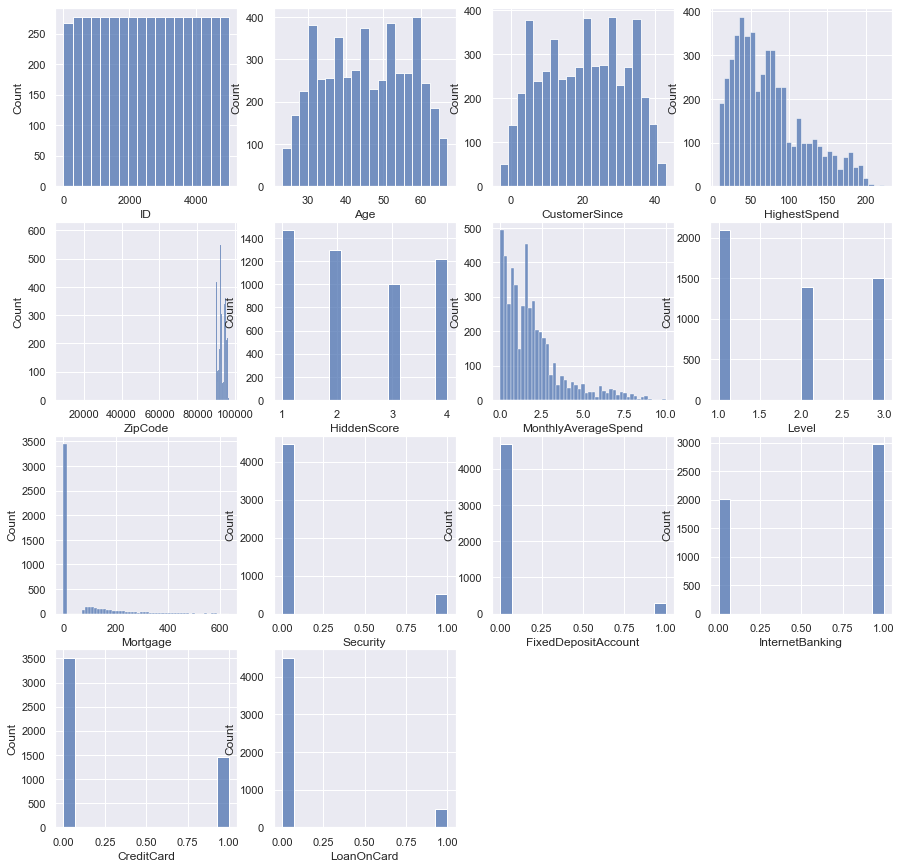

In [10]:
a = 5  # number of rows
b = 4  # number of columns
c=1

fig = plt.figure(figsize=(15,19))

for i in data.columns:
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.histplot(data[i]);
    c=c+1

### Inferences:
1. Security, FixedDepositAccount, InternetBanking, CreditCard and LoanOnCard can either be 0 or 1.
2. Levels can take 1,2 or 3. 1 being the most frequent.
3. Hiddenscore cab be 1,2,3 or 4. 1 being the most frequent.
4. Very few data entries possess a positive mortgage number.
5. MonthlyAverageSpend and HighestSpend seems to kind of follow chi-squared distribution.


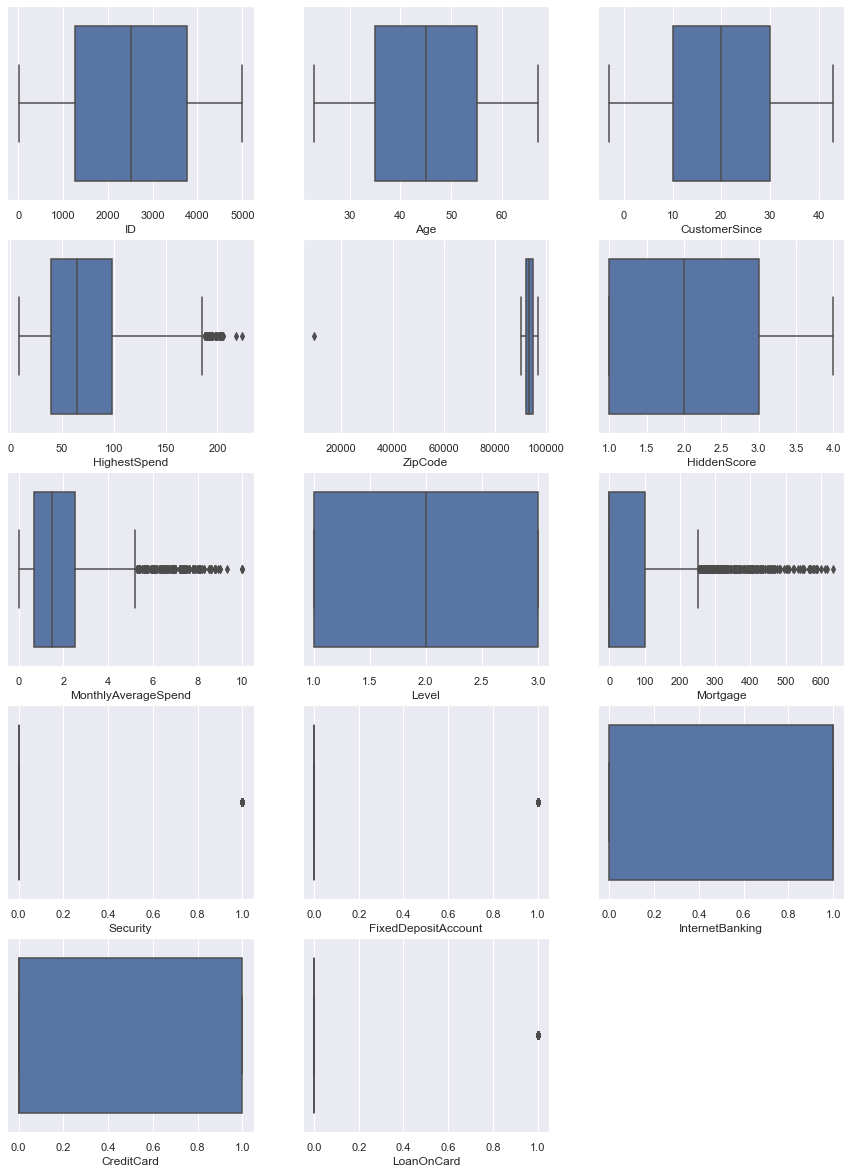

In [11]:
a = 6  # number of rows
b = 3  # number of columns
c=1

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,25))

for i in data.columns:  
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(data[i]);
    c=c+1

### Inference
1. MonthlyAverageSpend and Mortgage have significantly high outliers.
2. HighestSpend has many outliers.

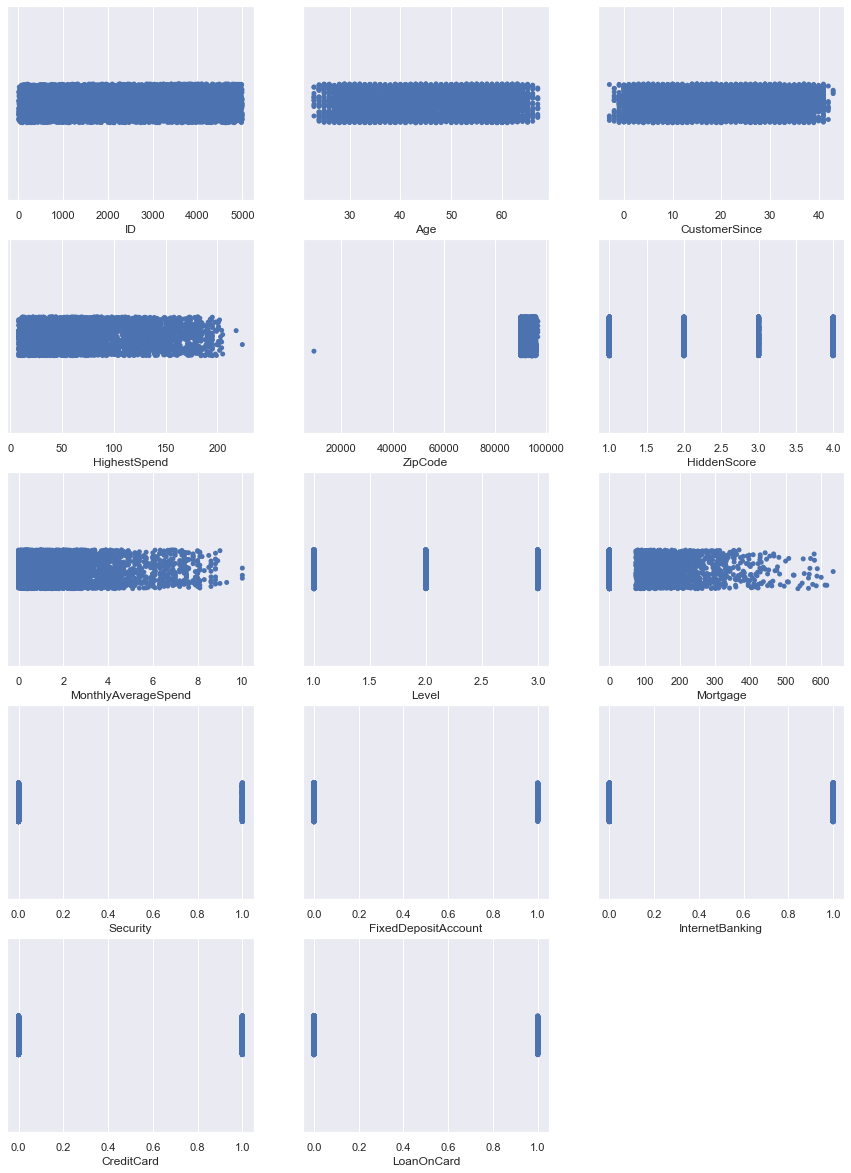

In [13]:
a = 6  # number of rows
b = 3  # number of columns
c=1

import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(15,25))

for i in data.columns:  # dropping column class as it is categorical type.
    
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.stripplot(data[i]);
    c=c+1

### Inference:
1. inferences on MonthlyAverageSpend and Mortgage from boxplots can be confirmed by stripplot

### 3.2 Bi and Multivariate Analysis

In [15]:
data.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

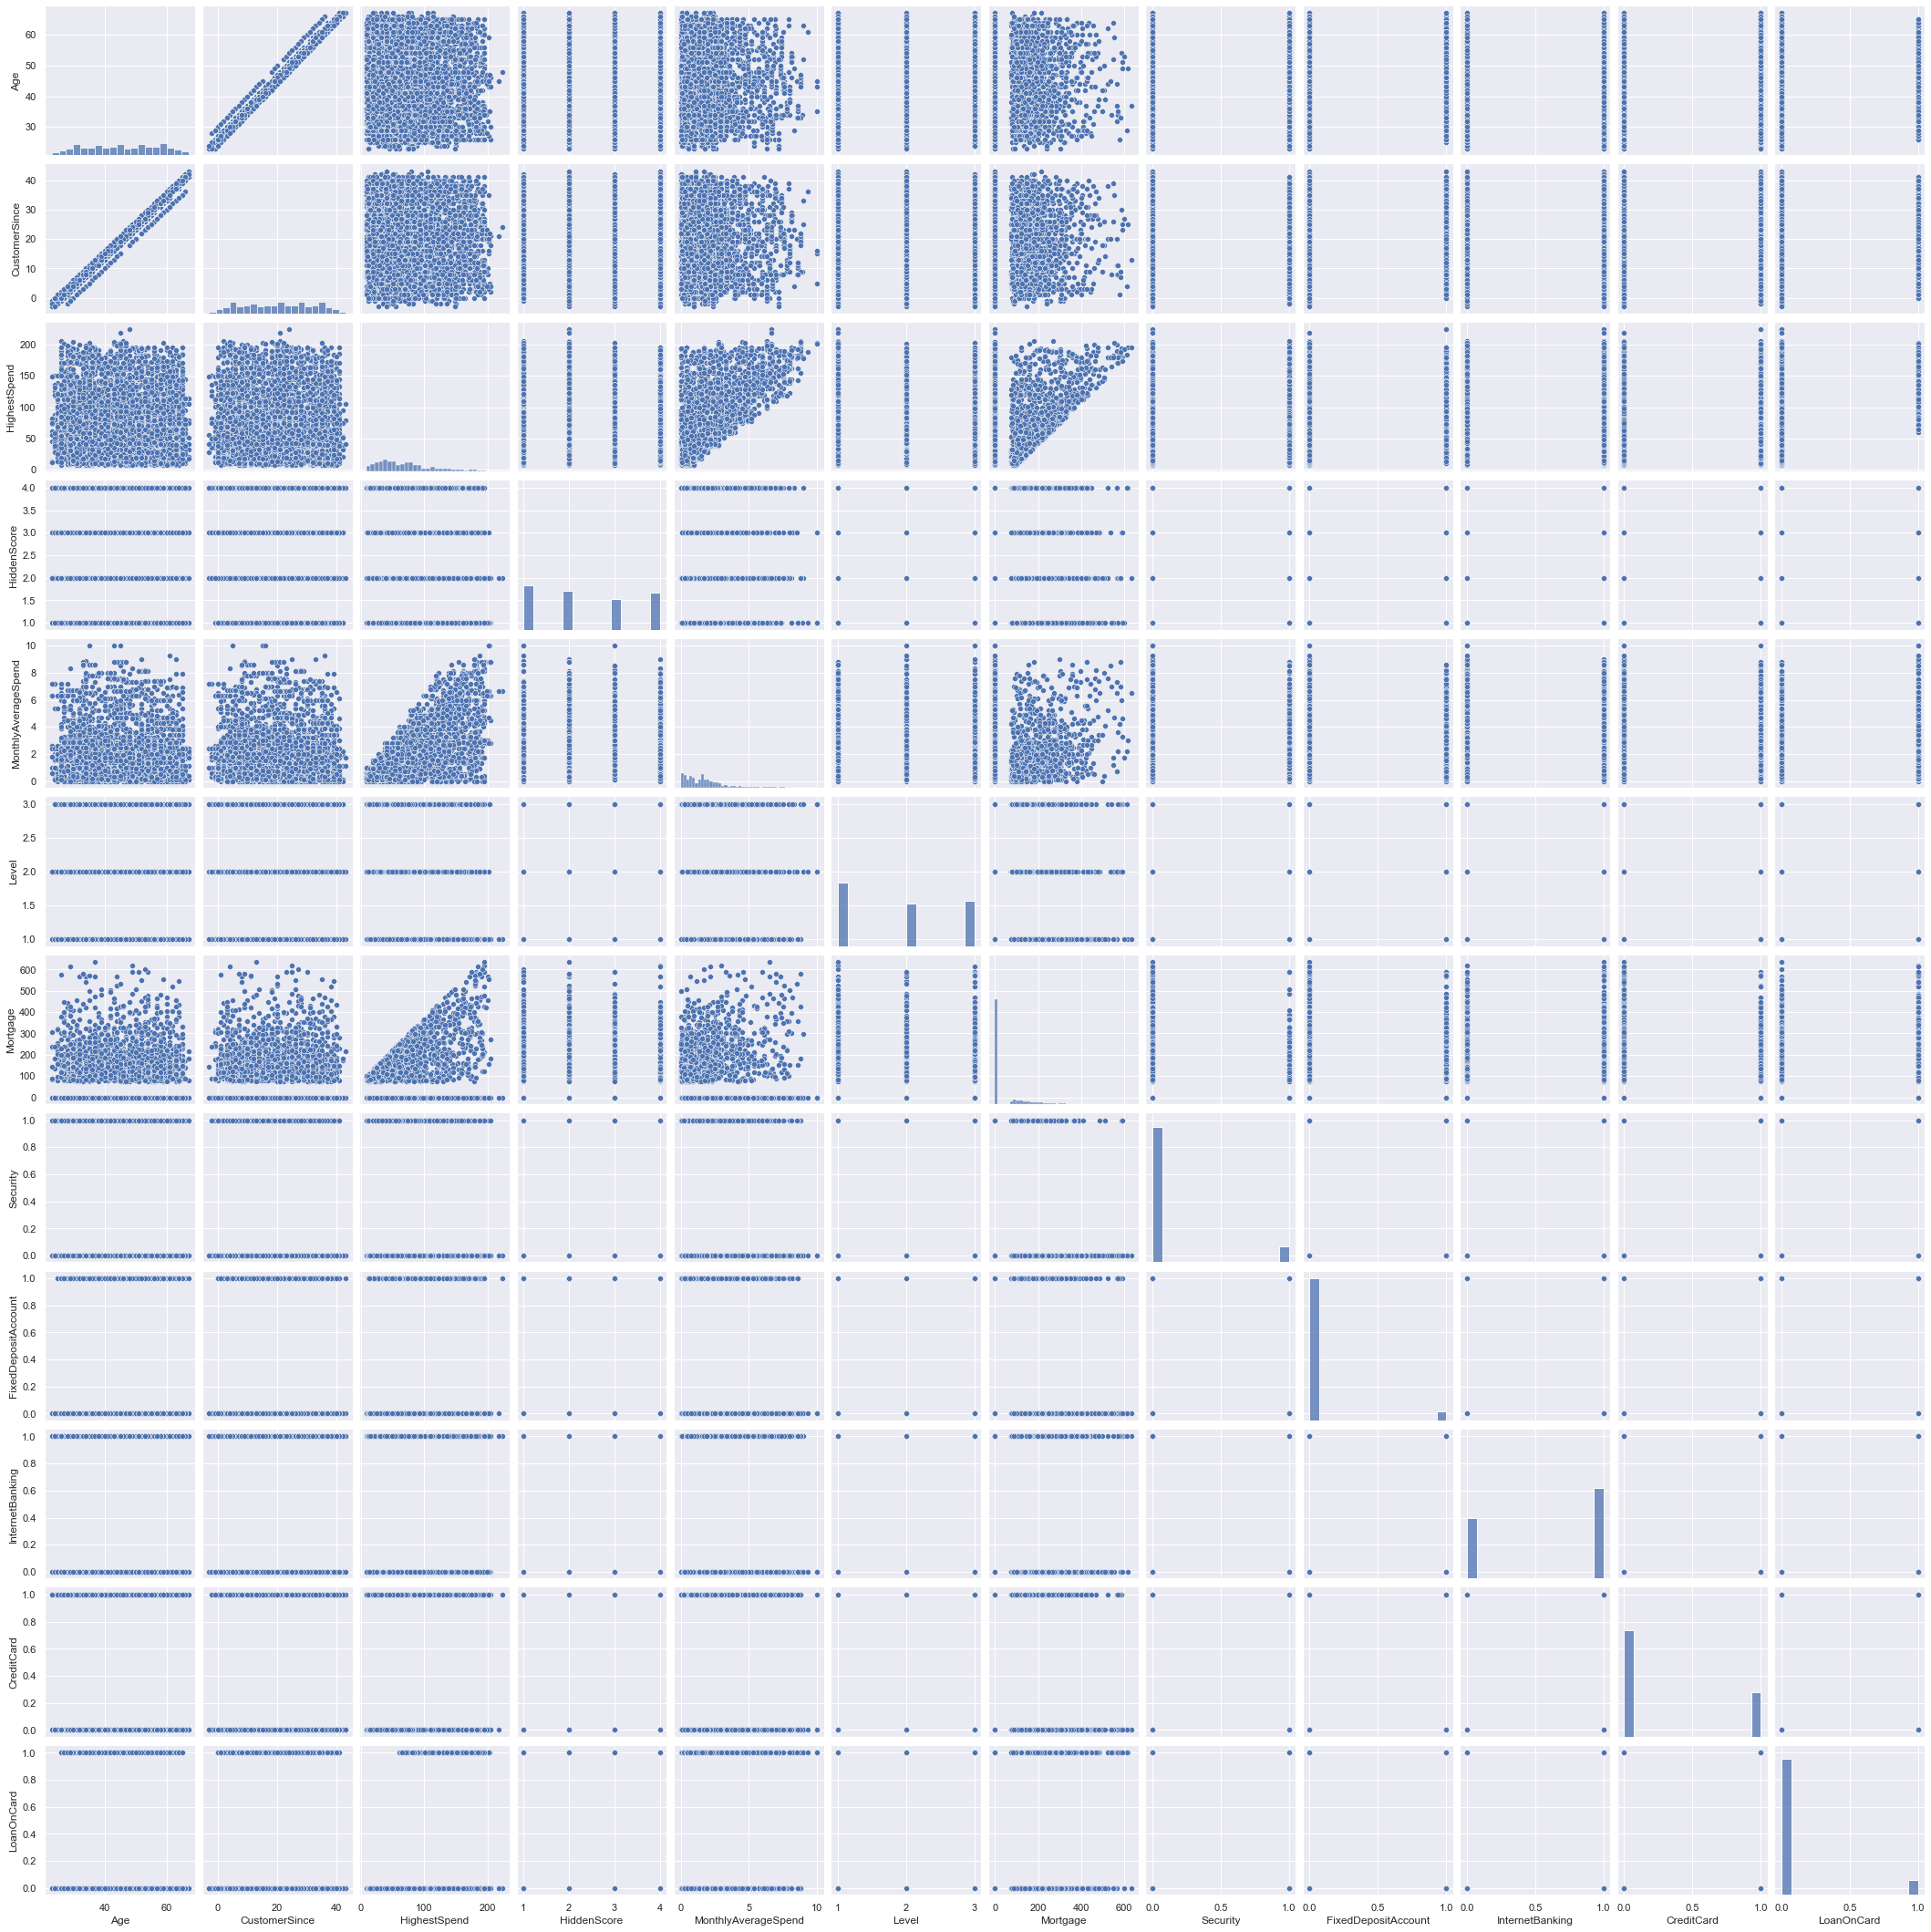

In [21]:
# pairplot with important features ; Ignored - ID, ZipCode.
sns.pairplot(data = data[['Age', 'CustomerSince', 'HighestSpend', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard','LoanOnCard']]);

## Inference:

1. MonthlyAverageSpend and HighestSpend seem to posses good correlation
2. No obvious correlation between other features, hence plotting correlation matrix for further insights

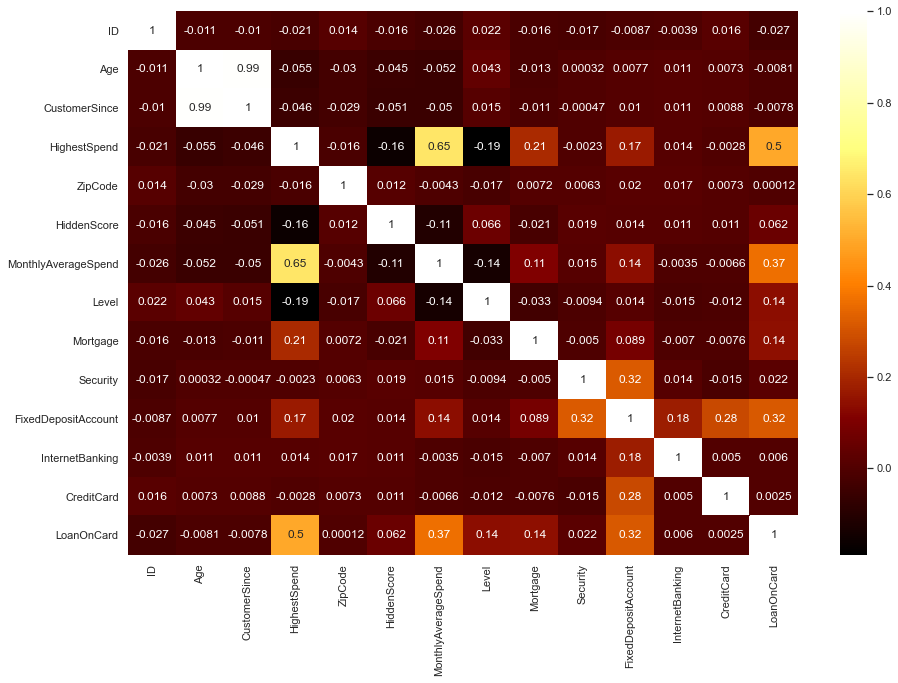

In [28]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data = data.corr(),annot=True,cmap ='afmhot');

#### Inference:

1. MonthlyAverageSpend and HighestSpend have good correlation
2. Other correlations can be observed in 
 - LoanOnCard vs HighestSpend
 - Loanoncard vs MonthlyAverageSpend
 - LoanOnCard vs FixedDepositAccount




####  Segregating Predictors vs target Attributes: Theory

- Since the bank intends to increase the Asset customers (borrowers) the customers who already have a loan on bank's credit card can serve as a the predictor class for the same.
- As LoanOnCard has high corelation with HighestSpend, MonthlyAverageSpend and FixedDepositAccount, these will act as the primary target attributes.
- Attributes such as ID and ZipCode will be dropped for the training and testing of the data
- InternetBanking and customersince will also be dropped from the target attribute as it has almost zero correlation, thereby making the model simpler and efficient
 

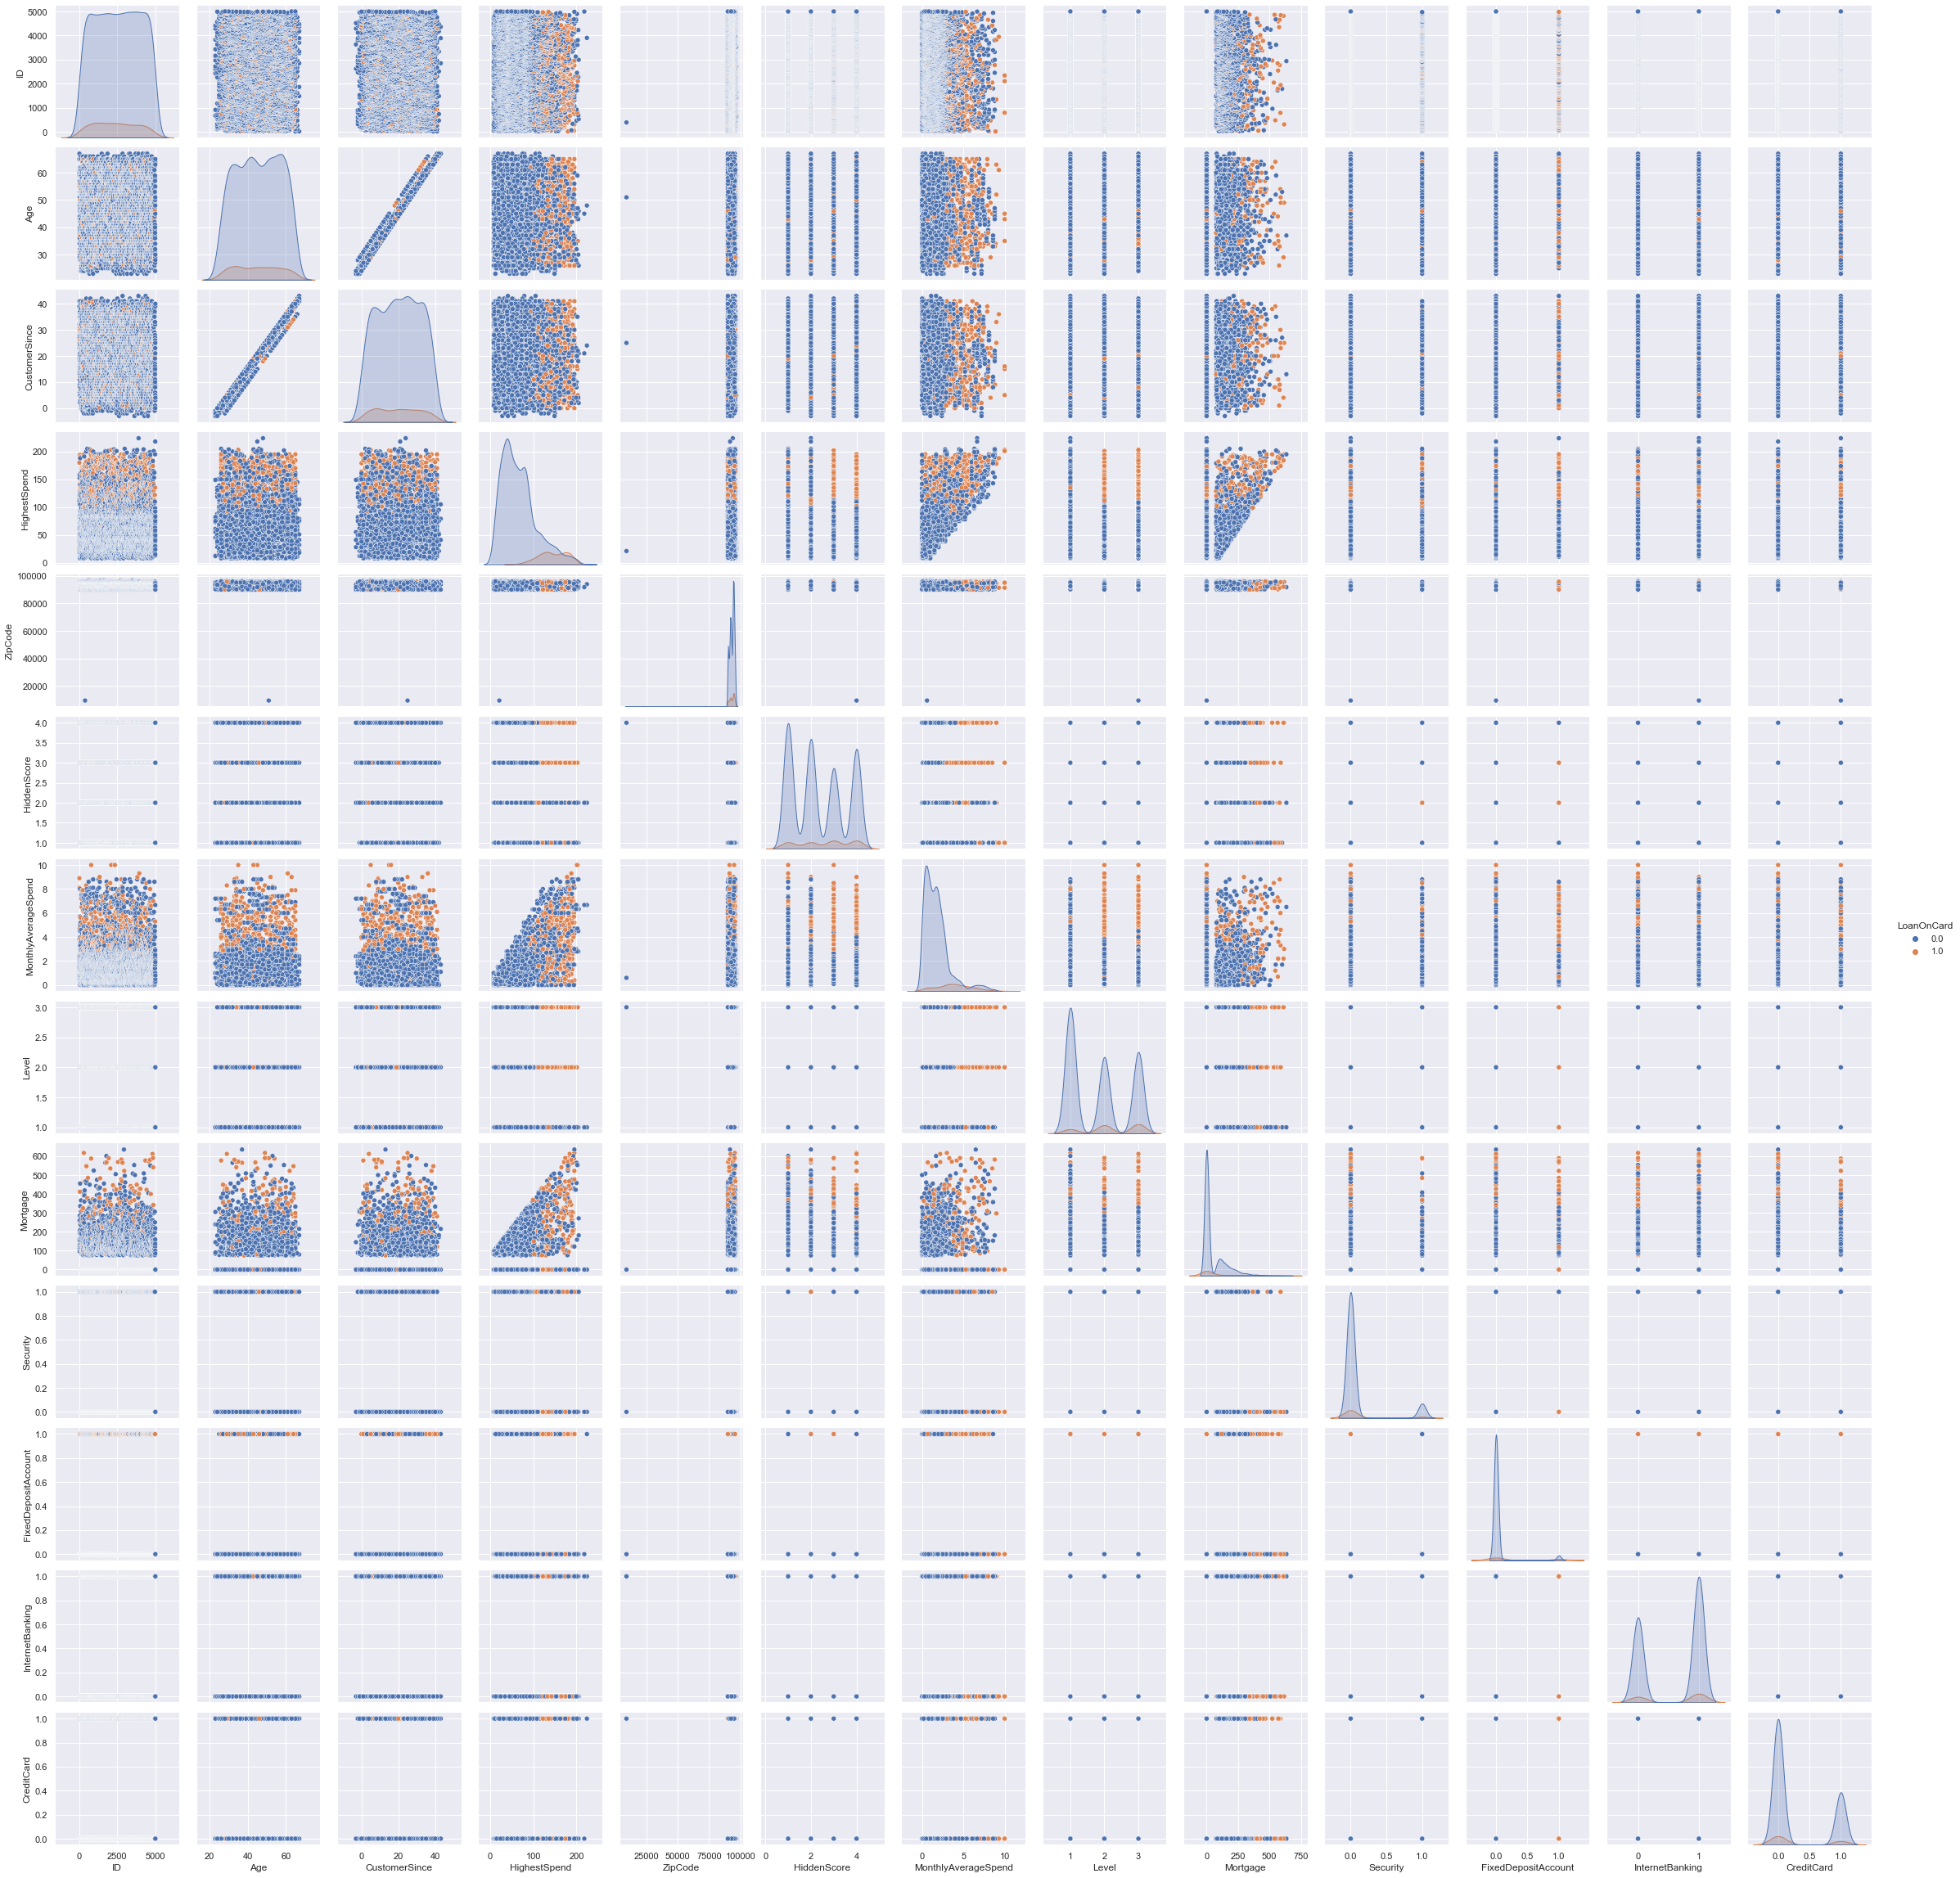

In [24]:
sns.pairplot(data = data, hue = 'LoanOnCard');

### Inference

1. Customers with high averageMonthlySpend and HighestSpend tend to take loans
2. HiddenScore 3 and 4 displays customers bending to take loans
3. High Mortgage customer have taken more loans
4. Level 2 and 3 tend to have loans

## 4. Balance checking

In [38]:
100*(data['LoanOnCard'].value_counts(normalize=True))

0.0    90.361446
1.0     9.638554
Name: LoanOnCard, dtype: float64

## Inference:

1. ~10% is 1 and ~90% is 0
2. Data is imbalanced but not heavily (under 1:100 bar range)
3. Hence not adding SMOTE methods or duplicating test dataframe entries.

## 5. Testing and Training and Feature splitting

In [35]:
X = data.drop(['ID', 'Age', 'CustomerSince', 'ZipCode','LoanOnCard'],axis=1)
Y = data['LoanOnCard']
print(X.head())
print("*"*60)
print(Y.head())

    HighestSpend  HiddenScore  MonthlyAverageSpend  Level  Mortgage  Security  \
9            180            1                  8.9      3         0         0   
10           105            4                  2.4      3         0         0   
11            45            3                  0.1      2         0         0   
12           114            2                  3.8      3         0         1   
13            40            4                  2.5      2         0         0   

    FixedDepositAccount  InternetBanking  CreditCard  
9                     0                0           0  
10                    0                0           0  
11                    0                1           0  
12                    0                0           0  
13                    0                1           0  
************************************************************
9     1.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: LoanOnCard, dtype: float64


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3486 entries, 565 to 1309
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HighestSpend         3486 non-null   int64  
 1   HiddenScore          3486 non-null   int64  
 2   MonthlyAverageSpend  3486 non-null   float64
 3   Level                3486 non-null   int64  
 4   Mortgage             3486 non-null   int64  
 5   Security             3486 non-null   int64  
 6   FixedDepositAccount  3486 non-null   int64  
 7   InternetBanking      3486 non-null   int64  
 8   CreditCard           3486 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 272.3 KB
None


In [49]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 2602 to 942
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HighestSpend         1494 non-null   int64  
 1   HiddenScore          1494 non-null   int64  
 2   MonthlyAverageSpend  1494 non-null   float64
 3   Level                1494 non-null   int64  
 4   Mortgage             1494 non-null   int64  
 5   Security             1494 non-null   int64  
 6   FixedDepositAccount  1494 non-null   int64  
 7   InternetBanking      1494 non-null   int64  
 8   CreditCard           1494 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 116.7 KB
None


##  6. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [58]:
# Prediction on train data
Y_pred_r = model.predict(X_train)
Y_pred_r

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
# Prediction on test data
Y_pred = model.predict(X_test)
Y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [60]:
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

print("Accuracy for test data: ", accuracy_score(Y_test, Y_pred))
print("Accuracy for train data: ",accuracy_score(Y_train, Y_pred_r))

Accuracy for test data:  0.9531459170013387
Accuracy for train data:  0.9466437177280551


### Inference:

1. The model shows a good accuracy of 95.31% (test data) and 94.66% (train data).
2. To ensure, moving onto other metrics

In [54]:
print(classification_report(Y_test, Y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.960     0.989     0.974      1347
         1.0      0.860     0.626     0.724       147

    accuracy                          0.953      1494
   macro avg      0.910     0.807     0.849      1494
weighted avg      0.950     0.953     0.950      1494



### Inference:

1. Precision is good
2. Recall for positive a little low, but f1 score comes out well

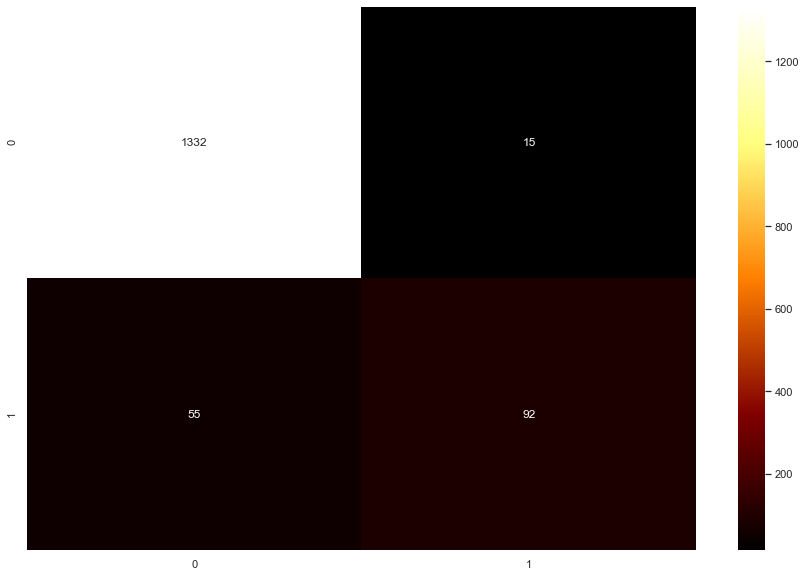

In [57]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True,cmap='afmhot', fmt='g');

### Inference:


## Tuning using standard data

In [61]:
# imported zscore for scaling the data
from scipy.stats import zscore

# Applied zscore on independent features
xtrainz = X_train.apply(zscore)
xtestz = X_test.apply(zscore)

modelz = LogisticRegression(random_state=0)
modelz.fit(xtrainz, Y_train)

ypred_z = modelz.predict(xtestz)

print("Accuracy of standardized data model: ", accuracy_score(Y_test, ypred_z))

Accuracy of standardized data model:  0.9571619812583668


### Inference

1. The results with standatrdized data are a little better (improvement from 95.3% to 95.7%)

In [62]:
print(classification_report(Y_test, ypred_z, digits=3))

              precision    recall  f1-score   support

         0.0      0.963     0.991     0.977      1347
         1.0      0.888     0.646     0.748       147

    accuracy                          0.957      1494
   macro avg      0.925     0.819     0.862      1494
weighted avg      0.955     0.957     0.954      1494



### Inference

1. The results are a bit improved (especially f1 score) with standardized data

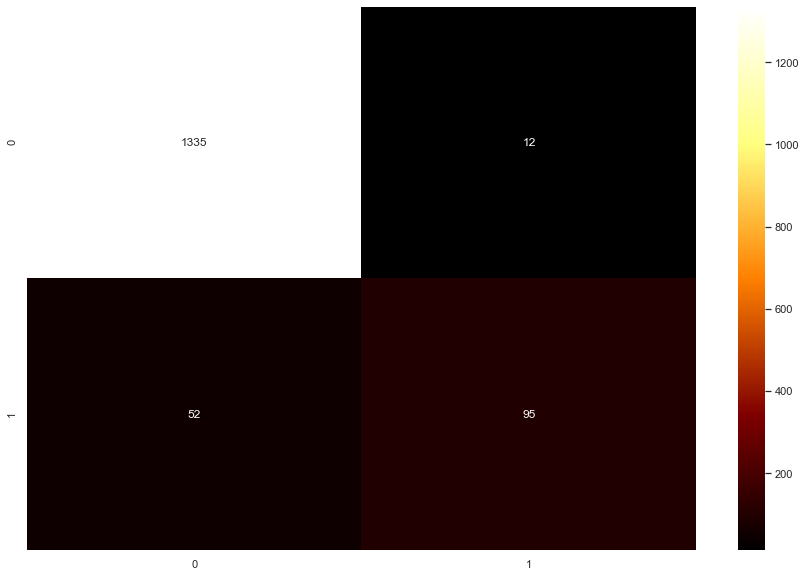

In [63]:
sns.heatmap(confusion_matrix(Y_test, ypred_z), annot=True,cmap='afmhot', fmt='g');

### Inference

1. Incorrect classifications are lower than the non standardized data

## 7. Naive Baye's Model 

In [64]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [67]:
# Prediction for train data 

Y_pred_gr = clf.predict(X_train)
Y_pred_gr

array([0., 0., 0., ..., 0., 0., 0.])

In [72]:
accuracy_score(Y_train, Y_pred_gr) #train

0.8866896156052783

In [68]:
# Prediction for test data

Y_pred_gt = clf.predict(X_test)
Y_pred_gt

array([1., 0., 0., ..., 0., 1., 0.])

In [69]:
accuracy_score(Y_test, Y_pred_gt) # test

0.8755020080321285

### Inference:
Accuracy is 87.55% (test set) and 88.67% (train set) which is again great but less than the Logistic Regression model

In [73]:
print(classification_report(Y_test, Y_pred_gt, digits=3))

              precision    recall  f1-score   support

         0.0      0.955     0.904     0.929      1347
         1.0      0.411     0.612     0.492       147

    accuracy                          0.876      1494
   macro avg      0.683     0.758     0.710      1494
weighted avg      0.902     0.876     0.886      1494



### Inference:

1. Has little lesser precision than logistic model
2. Lesser recall than logistic model
3. Lesser f1 score value than logistic model

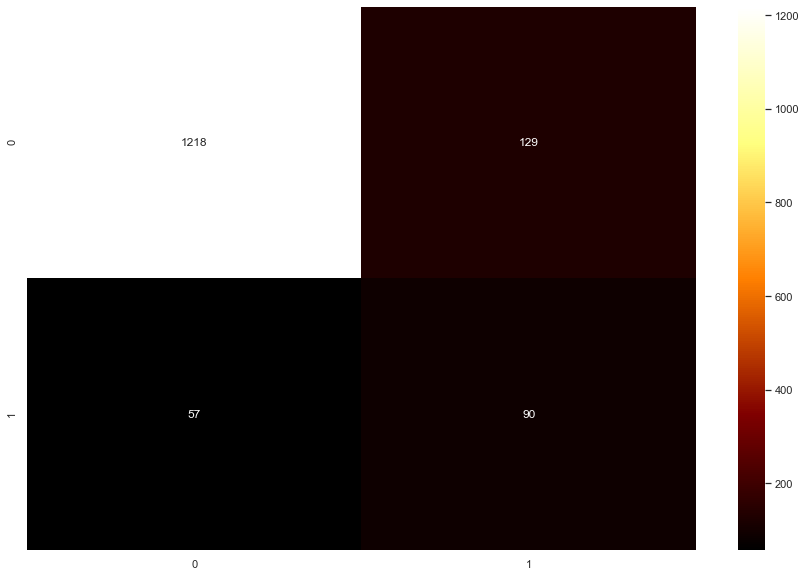

In [74]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_gt), annot=True,cmap='afmhot', fmt='g');

### Inference:

- The number of flase negatives and false positives is high than the logistic model

## 8. Conclusion

- The final data was obtained by merging the two given dataframes.
- During EDA, few null values were found, for further processing these values were omitted
- ID was the primary key
- Security, FixedDepositAccount, InternetBanking, CreditCard and LoanOnCard were found to be bivariate class columns
- Only HighestSpend, MonthlyAverageSpend and Mortgage had upper outliers, no bottom outliers were found.
- Attributes such as ID and ZipCode were dropped for the training and testing of the data.
- InternetBanking and customersince were also dropped from the target attribute as it has almost zero correlation, thereby making the model simpler and efficient.
- Data was imbalanced but not heavily (90% - 10%)
- The results with standatrdized data for the logistic regression was found to be better (improvement from 95.3% to 95.7%) 
- Accuracy of the Naive Baye's model came out as 87.55%, which is good but less than the Logistic model.
- **Hence the Logistic Regression model on standardized data can be considered as the best model based on the evaluated models.** 

## 9. Suggestions on Improvements

### 1. Quantity

- More data can be loaded from various sources within the company so that more information can be captured
- If necessary source of the source can be increased - Marketing, campaigns, human traffic, surveys, etc.
- Based on the output demand, if needed extra features can be adding, thus increasing the quantity of the entire dataset

### 2. Quality
- The data must come from a trustworthy source.
- Any approximation should be mentioned while handling the data to the model building team.
- The data initially can have parmeters like probability and confidence intervals.
- Lot of missing values / null values should be avoided at the collection source

### 3. Variety
- meta data from varoius sources should be consistent
- Semi-Structured and unstrcutured data must be carefully logged, as it is hard to deal with
- the column definitions must be clear with respect to the business context, so the analyst does not interpret it as something else
- Complex unstructured data can be avoided if not necessary

### 4. Velocity
- Real time trustworthy data collection.
- If need be, at the root level re-definition of few parameters must be possible.
- data quality assesment can be done to make the data better.
- Proper initial sampling can be performed every time a data entry takes place.

             ------------------------------------------- END --------------------------------------------------------